# Read and clean the data

We can start by getting an overview of the titanic data and create
a useable dataframe.

In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

titanic = pd.read_csv('titanic.csv')
titanic.info()
print(titanic.describe())
titanic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB
       PassengerId     Survived       Pclass          Age        SibSp  \
count  1309.000000  1309.000000  1309.000000  1046.000000  1309.000000   
mean    655.000000     0.377387     2.294882    29.881138     0.498854   
std     378.020061 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We have 1309 rows and the mean for the `Survived` feature is `0.337` so only
one third of the number of passengers survived.

- We can already remove the `Name`, `Ticket` and `Cabin` features as they are not
numerical values and don't provide meaningfull values. (Maybe the SibSp and Parch features could also be removed?)
We can also remove the `PassengenrId` column

- The `Embarked` and `Fare` features contain in total 3 `NaN` values. We can safely remove these
three rows as this number of row is too low to affect the result of the models.

- The `Age` feature has 263 NaN values. In this case instead of deleting these rows,
we can convert the NaN value to the mean of the age values.

- The only non numerical values are `Embarked` and `Sex`. We can convert the 'S' 'C' and 'Q' values to 0, 1, 2
and `male` `female` to 0 1.
We could create dummies variables with `pandas.get_dummies` function however I don't think it
will make the data easier to manipulate in this case.

After doing these steps we will have a "clean" dataframe.

In [29]:
# remove NaN rows from Embarked and Fare
df = titanic.dropna(subset=['Embarked'])
df = df.dropna(subset=['Fare'])

# Replace NaN age by the mean value
df['Age'].fillna((df['Age'].mean()), inplace=True)

# drop name, ticket and cabin
df = df.drop('Name', axis=1);
df = df.drop('Ticket', axis=1);
df = df.drop('Cabin', axis=1);
df = df.drop('PassengerId', axis=1);

# convert Sex to 0 1
df.loc[df['Sex'] == 'male', 'Sex'] = 0
df.loc[df['Sex'] == 'female', 'Sex'] = 1

# convert Embarked to S=0 C=1 Q=2
df.loc[df['Embarked'] == 'S', 'Embarked'] = 0 
df.loc[df['Embarked'] == 'C', 'Embarked'] = 1
df.loc[df['Embarked'] == 'Q', 'Embarked'] = 2
print(df.shape) # (1306, 9)
df.head()

(1306, 8)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


# KNN

Now that our dataframe is cleaned we can try to apply the k nearest neighbor classifier
to predict the `Survived` label.
We're going to split the dataset to train and test samples with `train_test_split`, apply the knn classifier
to the train dataset and apply the model from the training to the test samples to finally get an accuracy score.

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# remove the Survived column to create the features
X = df.drop('Survived', axis=1).values
print(X.shape)

# Only take the Survived values to create the labets
y = df['Survived'].values
print(y.shape) # check the shape has the format (num_value,)

# Split the data into train and test values. Train the classifier to create a model we'll apply on the test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(knn.score(X_test, y_test)) # 0.70

knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(X_train, y_train)
y_pred = knn10.predict(X_test)
knn10.score(X_test, y_test) # 0.68, not the best score?! The default n_neighbors value 5 gives a better score.

(1306, 7)
(1306,)
0.7117346938775511


0.6887755102040817

# Logistic Regression


In [32]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logreg.score(X_test, y_test)

/home/simon/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8647959183673469

We can see the score (accuracy) for the logistic regression is 0.86, much better than the KNN score!
This makes this model more adequate to use with the Titanic data.

We can create a confusion matrix to see the different prediction compared to the real labels

In [33]:
from sklearn import metrics

metrics.confusion_matrix(y_test, y_pred)

array([[226,  18],
       [ 35, 113]])

True positive: 226, predicted correctly survived
False negative: 18, predicted not survived but did
False positive: 35, predicted survived but didn't
True negative: 113, predicted correctly not survived

## Receiver Operator Characteristic

We know that there is a class imbalance as there are more 0 than 1 for the `Survived` feature.
This means that we can try to have a higher threshold value to predict more 0 without creating
more false positive.

We can draw the ROC curve to confirm this:

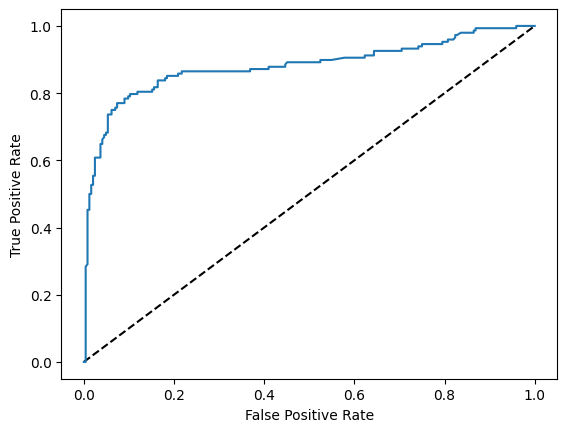

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Area Under the Curve

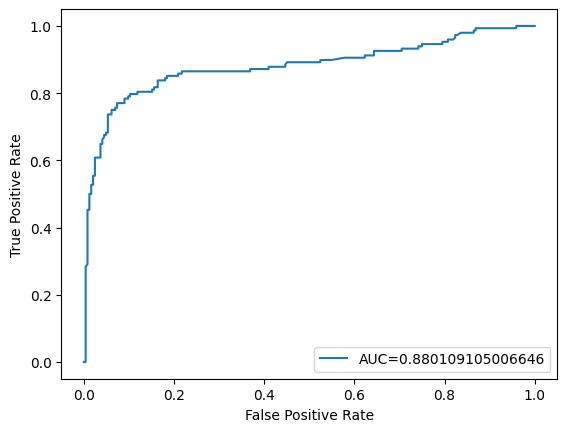

In [35]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Linear Regression

We can first create a scatter matrix to see if we can
visually detect any corralation between features

array([[<Axes: xlabel='Survived', ylabel='Survived'>,
        <Axes: xlabel='Pclass', ylabel='Survived'>,
        <Axes: xlabel='Age', ylabel='Survived'>,
        <Axes: xlabel='SibSp', ylabel='Survived'>,
        <Axes: xlabel='Parch', ylabel='Survived'>,
        <Axes: xlabel='Fare', ylabel='Survived'>],
       [<Axes: xlabel='Survived', ylabel='Pclass'>,
        <Axes: xlabel='Pclass', ylabel='Pclass'>,
        <Axes: xlabel='Age', ylabel='Pclass'>,
        <Axes: xlabel='SibSp', ylabel='Pclass'>,
        <Axes: xlabel='Parch', ylabel='Pclass'>,
        <Axes: xlabel='Fare', ylabel='Pclass'>],
       [<Axes: xlabel='Survived', ylabel='Age'>,
        <Axes: xlabel='Pclass', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='SibSp', ylabel='Age'>,
        <Axes: xlabel='Parch', ylabel='Age'>,
        <Axes: xlabel='Fare', ylabel='Age'>],
       [<Axes: xlabel='Survived', ylabel='SibSp'>,
        <Axes: xlabel='Pclass', ylabel='SibSp'>,
        <Axes: xla

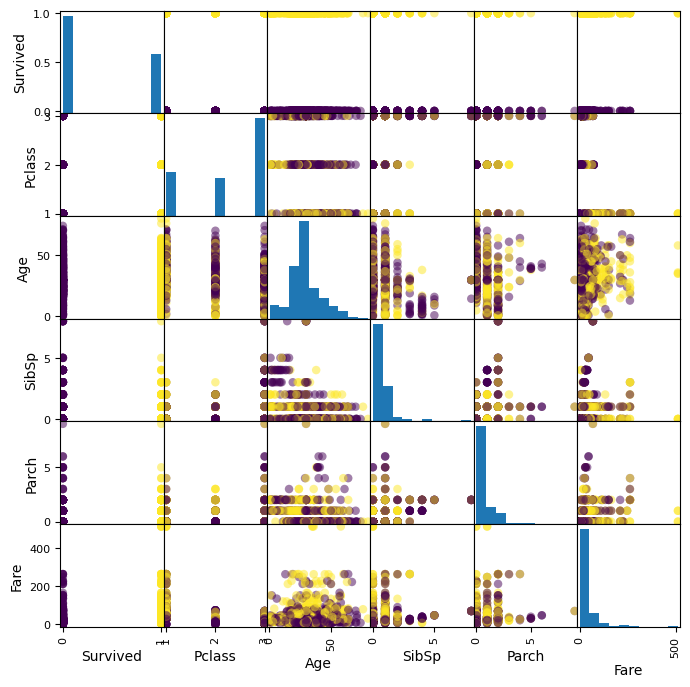

<Figure size 640x480 with 0 Axes>

In [36]:
vis = pd.plotting.scatter_matrix(df, c=y, figsize=[8,8], s=150, marker='.')
plt.figure()
vis

We can see there is a negative corroletion between the number of siblings
and the age of the passenger.

I think this is the only obvious linear regression we can try.
Just to test another one we can try a linear regression by comparing age/fare

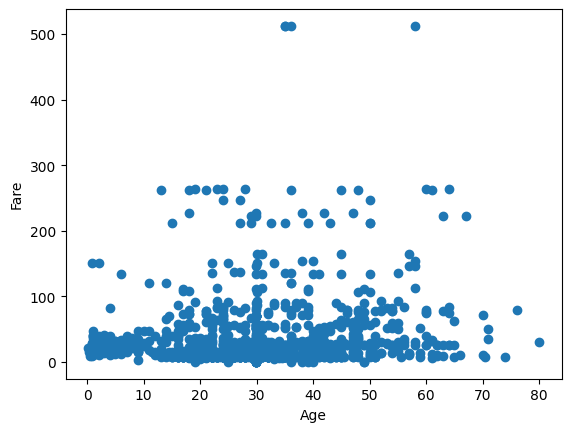

In [38]:
age = df['Age'].values.reshape(-1,1)
fare = df['Fare'].values.reshape(-1,1)
plt.scatter(age, fare)
plt.ylabel('Fare')
plt.xlabel('Age')
plt.show()

From the plotting we can see that we don't have a clear correlation between the ages and the fares.

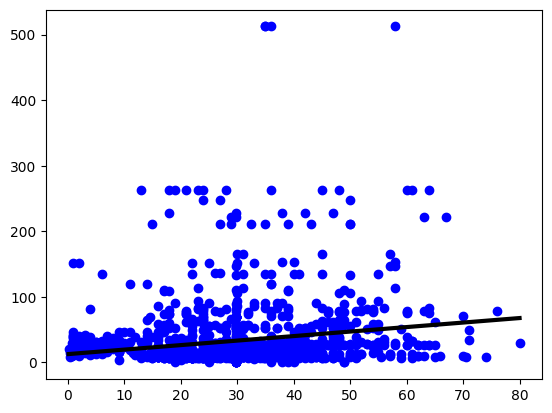

In [40]:
model = LinearRegression()
model.fit(age, fare)
prediction_space = np.linspace(min(age), max(age)).reshape(-1,1)
plt.scatter(age, fare, color='blue')
plt.plot(prediction_space, model.predict(prediction_space),
         color='black', linewidth=3)
plt.show()

I don't think the linear regression applied to age/fare is really working in this case

Let's try with siblings and age

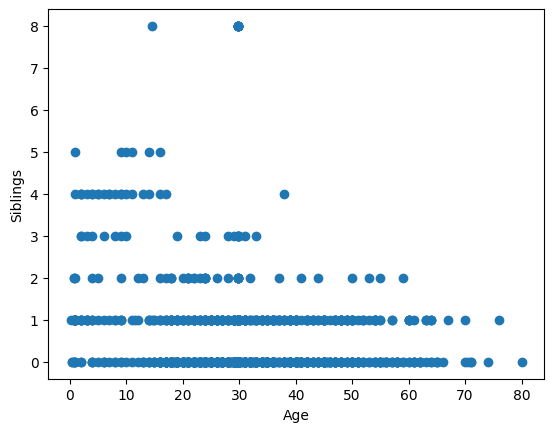

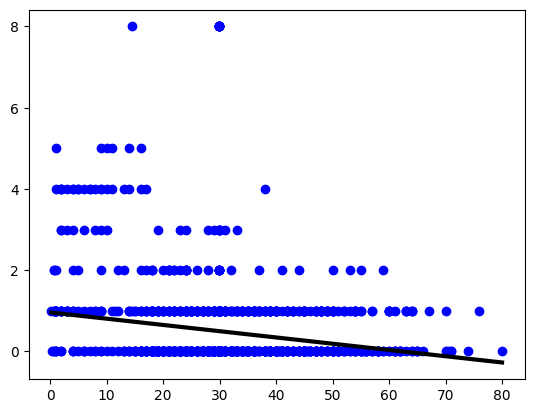

In [43]:
age = df['Age'].values.reshape(-1,1)
sibling = df['SibSp'].values.reshape(-1,1)
plt.scatter(age, sibling)
plt.ylabel('Siblings')
plt.xlabel('Age')
plt.show()

model = LinearRegression()
model.fit(age, sibling)
prediction_space = np.linspace(min(age), max(age)).reshape(-1,1)
plt.scatter(age, sibling, color='blue')
plt.plot(prediction_space, model.predict(prediction_space),
         color='black', linewidth=3)
plt.show()